### DBSCAN mit epsilon = 1 und Maschine 1

=== STARTING ANALYSIS ===

1. Daten werden eingelesen...
   Parsing data string...
   Anzahl gelesener Zeilen: 877209
   Spalten: ['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration', 'errorID', 'failure', 'comp', 'model', 'age', 'volt_rotate', 'pressure_vibration']

Ausreißer-Statistiken:
Anzahl Ausreißer: 99

Ausreißer-Zeitpunkte und Werte:

Zeitpunkt: 2015-01-03 14:00:00
volt: 0.44
rotate: 0.63
pressure: 0.29
vibration: 0.84

Zeitpunkt: 2015-01-04 03:00:00
volt: 0.60
rotate: 0.66
pressure: 0.46
vibration: 0.69

Zeitpunkt: 2015-01-04 11:00:00
volt: 0.75
rotate: 0.57
pressure: 0.33
vibration: 0.59

Zeitpunkt: 2015-01-04 14:00:00
volt: 0.20
rotate: 0.61
pressure: 0.45
vibration: 0.56

Zeitpunkt: 2015-01-12 17:00:00
volt: 0.47
rotate: 0.49
pressure: 0.06
vibration: 0.45

Zeitpunkt: 2015-01-17 07:00:00
volt: 0.89
rotate: 0.64
pressure: 0.33
vibration: 0.48

Zeitpunkt: 2015-01-18 17:00:00
volt: 0.58
rotate: 0.80
pressure: 0.19
vibration: 0.36

Zeitpunkt: 2015-01-26 17:00:00

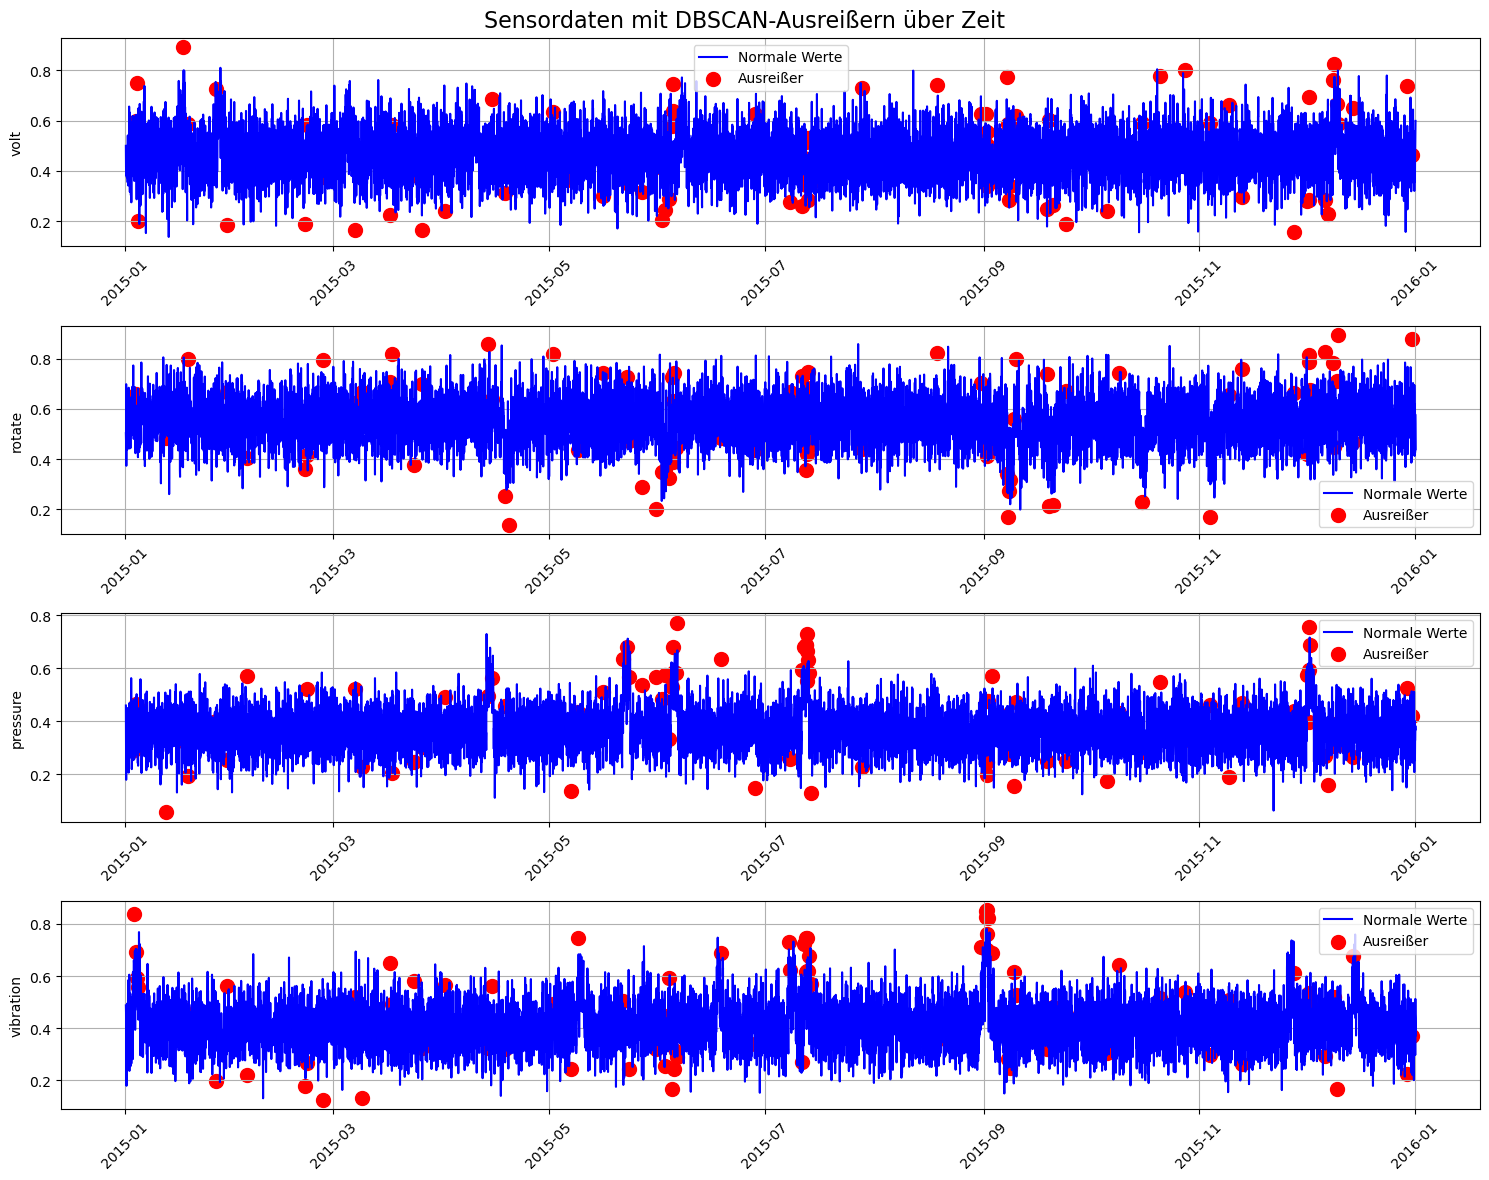

In [102]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
from datetime import datetime
from io import StringIO

print("=== STARTING ANALYSIS ===")

# Daten einlesen
print("\n1. Daten werden eingelesen...")
def parse_data(data_string):
    print("   Parsing data string...")
    df = pd.read_pickle(data_string)
    df['datetime'] = pd.to_datetime(df['datetime'])
    print(f"   Anzahl gelesener Zeilen: {len(df)}")
    print(f"   Spalten: {df.columns.tolist()}")
    return df

df = parse_data(data_string = "../data/PdM_merged_preprocessed.pkl")

df = df[df['machineID'] == 1]
features = ['volt', 'rotate', 'pressure', 'vibration']
X = df[features]

# DBSCAN für Ausreißererkennung
dbscan = DBSCAN(eps=0.075, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

# Ausreißer identifizieren (Label -1)
outliers = df[dbscan_labels == -1]
normal_points = df[dbscan_labels != -1]

# Erstelle mehrere Subplots für jeden Sensor
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Sensordaten mit DBSCAN-Ausreißern über Zeit', fontsize=16)

for idx, feature in enumerate(features):
    # Plot normale Punkte
    axes[idx].plot(normal_points['datetime'], normal_points[feature], 'b-', label='Normale Werte')
    
    # Plot Ausreißer als rote Punkte
    if len(outliers) > 0:
        axes[idx].scatter(outliers['datetime'], outliers[feature], color='red', marker='o', 
                         s=100, label='Ausreißer')
    
    # Formatierung
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True)
    axes[idx].legend()
    
    # Rotiere x-Achsen Labels für bessere Lesbarkeit
    plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45)

# Enge Layout-Anpassung
plt.tight_layout()

# Statistiken ausgeben
print("\nAusreißer-Statistiken:")
print(f"Anzahl Ausreißer: {len(outliers)}")
if len(outliers) > 0:
    print("\nAusreißer-Zeitpunkte und Werte:")
    for _, row in outliers.iterrows():
        print(f"\nZeitpunkt: {row['datetime']}")
        for feature in features:
            print(f"{feature}: {row[feature]:.2f}")

print("\nStatistische Zusammenfassung der Ausreißer:")
if len(outliers) > 0:
    print(outliers[features].describe())
else:
    print("Keine Ausreißer gefunden")

# Anzahl an Ausreißern
print("\nAnzahl Ausreißer pro Sensor:")
print(outliers[features].count())

### K-Means mit 1%-Ausreißer-Identifikation von Maschine 1

/home/EnzoZ/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Ausreißer-Statistiken:
Anzahl Ausreißer: 88

Ausreißer-Zeitpunkte und Werte:

Zeitpunkt: 2015-01-03 14:00:00
volt: 0.44
rotate: 0.63
pressure: 0.29
vibration: 0.84

Zeitpunkt: 2015-01-06 22:00:00
volt: 0.15
rotate: 0.52
pressure: 0.39
vibration: 0.50

Zeitpunkt: 2015-01-12 17:00:00
volt: 0.47
rotate: 0.49
pressure: 0.06
vibration: 0.45

Zeitpunkt: 2015-01-13 09:00:00
volt: 0.14
rotate: 0.61
pressure: 0.40
vibration: 0.36

Zeitpunkt: 2015-01-17 07:00:00
volt: 0.89
rotate: 0.64
pressure: 0.33
vibration: 0.48

Zeitpunkt: 2015-01-17 18:00:00
volt: 0.80
rotate: 0.44
pressure: 0.36
vibration: 0.56

Zeitpunkt: 2015-01-18 17:00:00
volt: 0.58
rotate: 0.80
pressure: 0.19
vibration: 0.36

Zeitpunkt: 2015-01-27 01:00:00
volt: 0.74
rotate: 0.73
pressure: 0.46
vibration: 0.42

Zeitpunkt: 2015-01-29 21:00:00
volt: 0.18
rotate: 0.67
pressure: 0.25
vibration: 0.56

Zeitpunkt: 2015-02-09 02:00:00
volt: 0.35
rotate: 0.58
pressure: 0.17
vibration: 0.13

Zeitpunkt: 2015-02-12 18:00:00
volt: 0.18
rotate: 0

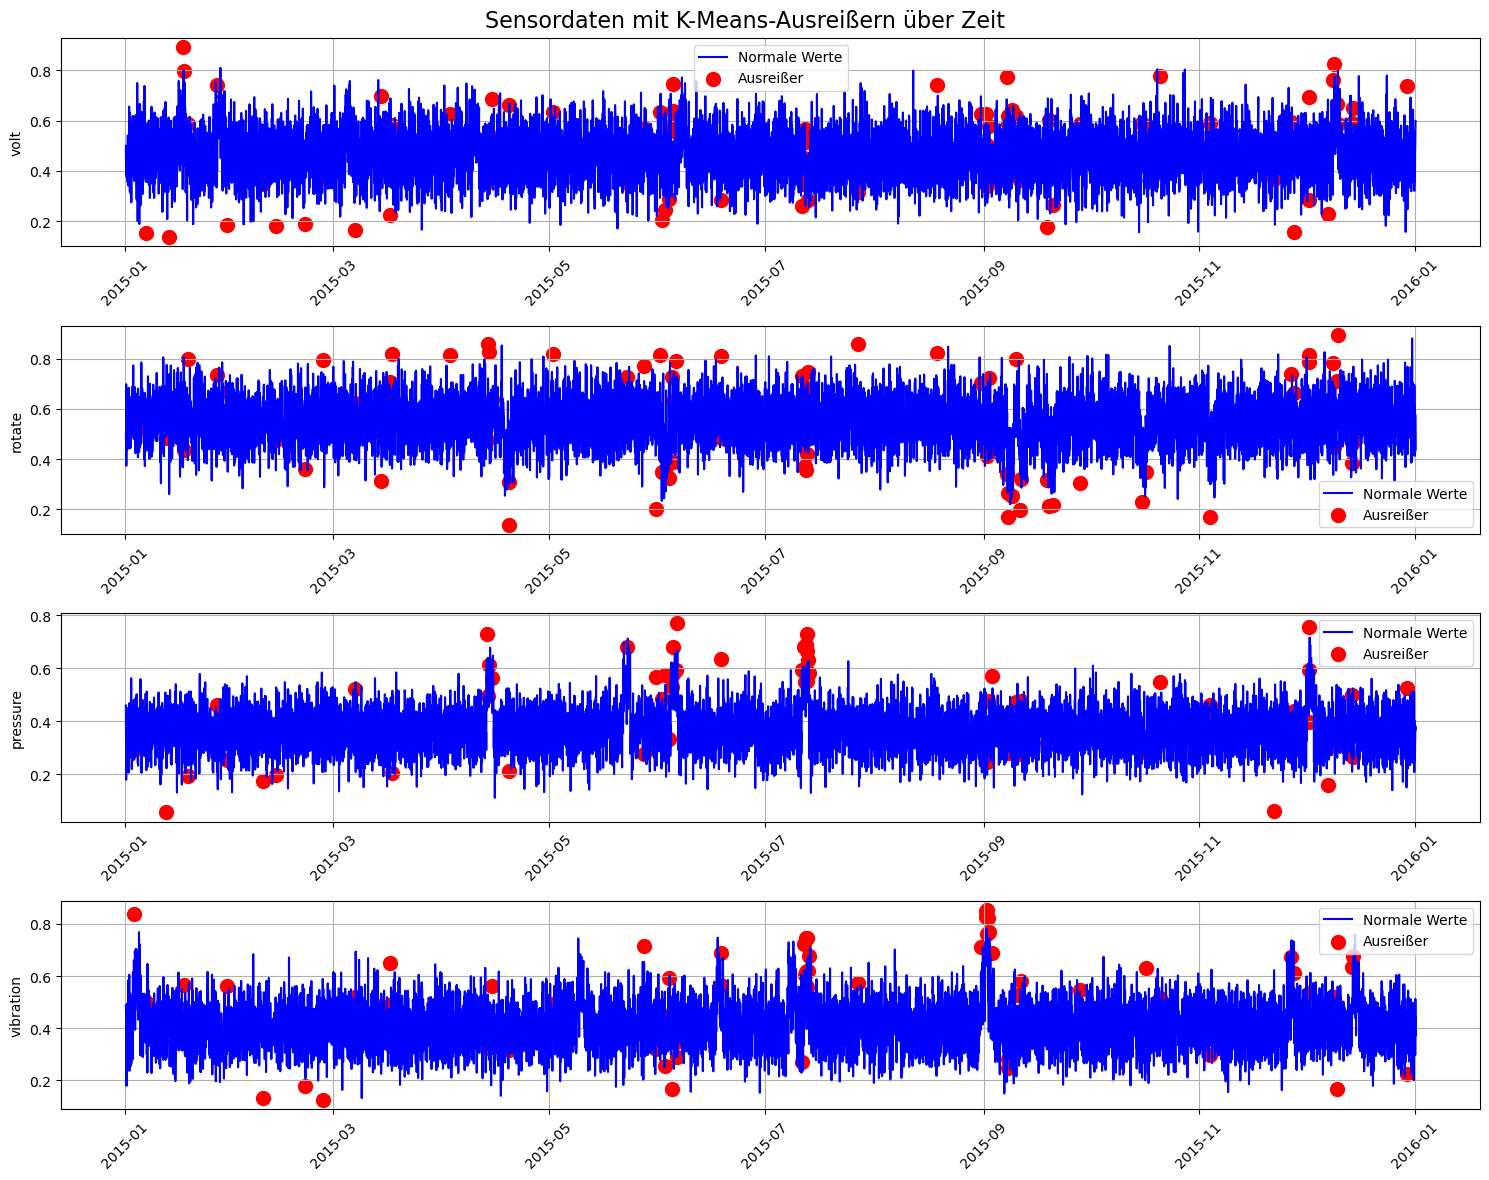

In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_array = X.values

# K-Means Cluster erstellen
n_clusters = 5 # Anzahl der Cluster, kann angepasst werden
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Cluster-Zentren berechnen
cluster_centers = kmeans.cluster_centers_

# Abstände zum nächstgelegenen Clusterzentrum berechnen
distances = np.min(np.linalg.norm(X_array[:, np.newaxis] - cluster_centers, axis=2), axis=1)

# Ausreißer-Definition: Punkte mit einem Abstand, der eine Schwelle überschreitet
threshold = np.percentile(distances, 99)  # z. B. die obersten 5% der Abstände
outliers = df[distances > threshold]
normal_points = df[distances <= threshold]

# Erstelle mehrere Subplots für jeden Sensor
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Sensordaten mit K-Means-Ausreißern über Zeit', fontsize=16)

for idx, feature in enumerate(features):
    # Plot normale Punkte
    axes[idx].plot(normal_points['datetime'], normal_points[feature], 'b-', label='Normale Werte')
    
    # Plot Ausreißer als rote Punkte
    if len(outliers) > 0:
        axes[idx].scatter(outliers['datetime'], outliers[feature], color='red', marker='o', 
                          s=100, label='Ausreißer')
    
    # Formatierung
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True)
    axes[idx].legend()
    
    # Rotiere x-Achsen Labels für bessere Lesbarkeit
    plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45)

# Enge Layout-Anpassung
plt.tight_layout()

# Statistiken ausgeben
print("\nAusreißer-Statistiken:")
print(f"Anzahl Ausreißer: {len(outliers)}")
if len(outliers) > 0:
    print("\nAusreißer-Zeitpunkte und Werte:")
    for _, row in outliers.iterrows():
        print(f"\nZeitpunkt: {row['datetime']}")
        for feature in features:
            print(f"{feature}: {row[feature]:.2f}")

print("\nStatistische Zusammenfassung der Ausreißer:")
if len(outliers) > 0:
    print(outliers[features].describe())
else:
    print("Keine Ausreißer gefunden")

# Anzahl an Ausreißern
print("\nAnzahl Ausreißer pro Sensor:")
print(outliers[features].count())


In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

normal_data = df[(df["errorID"] == 0) & (df["failure"] == 0) & (df["comp"] == 0)]
normal_data = normal_data.drop(["datetime", "machineID", "errorID", "failure", "comp", "model"], axis=1)


,volt,rotate,pressure,vibration,age,volt_rotate,pressure_vibration
0,0.499928,0.503194,0.459050,0.487945,0.9,0.251561,0.223991
1,0.415395,0.474884,0.328274,0.460912,0.9,0.197265,0.151306
2,0.466796,0.698752,0.178160,0.311752,0.9,0.326175,0.055542
3,0.412756,0.373197,0.430624,0.423896,0.9,0.154039,0.182540
4,0.382001,0.533508,0.450207,0.179498,0.9,0.203801,0.080811
...,...,...,...,...,...,...,...
8767,0.357379,0.560238,0.252090,0.465502,0.9,0.200217,0.117349
8768,0.475847,0.426293,0.329074,0.439878,0.9,0.202850,0.144752
8769,0.489600,0.578656,0.328448,0.297453,0.9,0.283310,0.097698
8770,0.550669,0.539700,0.381972,0.512525,0.9,0.297196,0.195770


Neuverarbeitung der Daten, da die vorherige Verarbeitung die Werte mit dem StandardScaler auf negative und postive Werte gebracht hat und mit der Relu-Funktion gearbeitet wird. Wenn bei der Relu-Funktion Werte unter 0 sind, werden diese auf 0 gesetzt. Dadurch wird die Ausreißer-Identifikation erschwert.

          volt    rotate  pressure  vibration  age  volt_rotate  \
0     0.499928  0.503194  0.459050   0.487945  0.9     0.251561   
1     0.415395  0.474884  0.328274   0.460912  0.9     0.197265   
2     0.466796  0.698752  0.178160   0.311752  0.9     0.326175   
3     0.412756  0.373197  0.430624   0.423896  0.9     0.154039   
4     0.382001  0.533508  0.450207   0.179498  0.9     0.203801   
...        ...       ...       ...        ...  ...          ...   
8767  0.357379  0.560238  0.252090   0.465502  0.9     0.200217   
8768  0.475847  0.426293  0.329074   0.439878  0.9     0.202850   
8769  0.489600  0.578656  0.328448   0.297453  0.9     0.283310   
8770  0.550669  0.539700  0.381972   0.512525  0.9     0.297196   
8771  0.599144  0.438932  0.368605   0.372503  0.9     0.262983   

      pressure_vibration  
0               0.223991  
1               0.151306  
2               0.055542  
3               0.182540  
4               0.080811  
...                  ...  
8767  

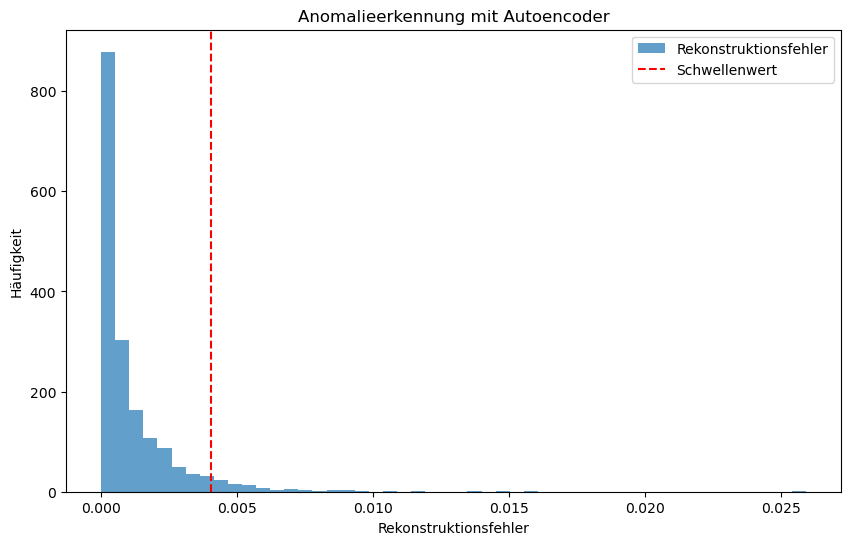

In [109]:
# 5. Trainings- und Testdaten aufteilen
X_train, X_test = train_test_split(normal_data, test_size=0.2, random_state=42)

# 6. Autoencoder-Modell definieren
input_dim = X_train.shape[1]
encoding_dim = 5  # Anzahl der Neuronen im versteckten Layer

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_layer)
decoded = Dense(input_dim, activation="sigmoid")(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# 7. Modell trainieren
history = autoencoder.fit(X_train, X_train, 
                          epochs=30, 
                          batch_size=32, 
                          validation_data=(X_test, X_test),
                          verbose=1)

# 8. Rekonstruktionsfehler berechnen
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# 9. Schwellenwert festlegen (z.B. 95. Perzentil des Fehlers)
threshold = np.percentile(mse, 95)

# 10. Anomalien erkennen
anomalies = mse > threshold
print(f"Anomalien erkannt: {np.sum(anomalies)}")

# 11. Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.7, label="Rekonstruktionsfehler")
plt.axvline(threshold, color="red", linestyle="--", label="Schwellenwert")
plt.xlabel("Rekonstruktionsfehler")
plt.ylabel("Häufigkeit")
plt.legend()
plt.title("Anomalieerkennung mit Autoencoder")
plt.show()


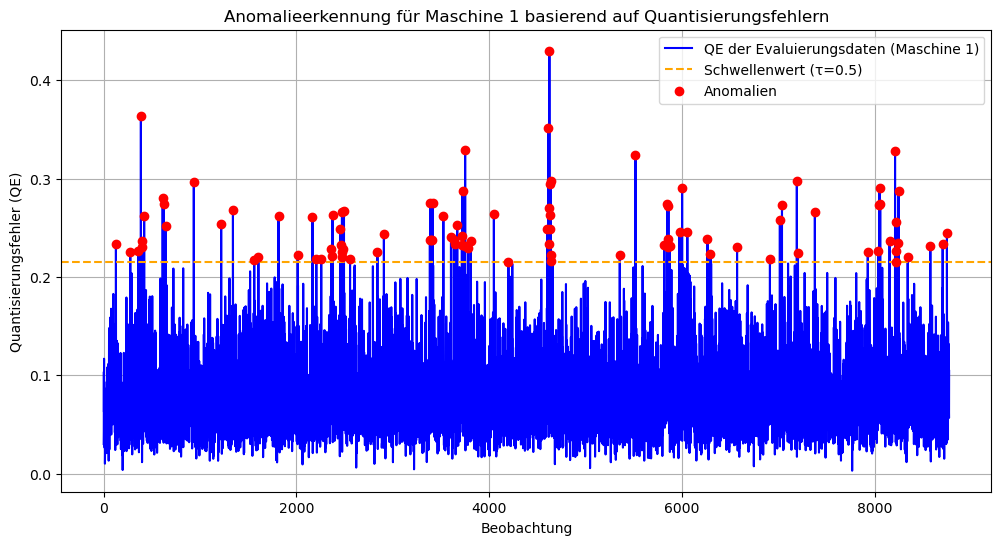

In [120]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

data_scaled = df.drop(["datetime", "machineID", "errorID", "failure", "comp", "model"], axis=1)
data_scaled = data_scaled.values

# 2. SOM initialisieren und trainieren
som = MiniSom(x=10, y=10, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_scaled)
som.train_random(data_scaled, num_iteration=100)

# 3. Quantisierungsfehler berechnen
def calculate_quantization_error(som, data):
    errors = []
    for sample in data:
        winner = som.winner(sample)
        weight = som.get_weights()[winner]
        error = np.linalg.norm(sample - weight)
        errors.append(error)
    return np.array(errors)

quantization_errors = calculate_quantization_error(som, data_scaled)

# 4. Schwellenwert berechnen
tau = 0.5  # Justierbarer Parameter
threshold = tau * np.max(quantization_errors)

# 5. Daten filtern: Nur Maschine 1
machine_1_data = df[df["machineID"] == 1]
machine_1_scaled = machine_1_data.drop(["datetime", "machineID", "errorID", "failure", "comp", "model"], axis=1)

# Convert machine_1_scaled to numeric values
machine_1_scaled = machine_1_scaled.apply(pd.to_numeric, errors='coerce').fillna(0).values

machine_1_errors = calculate_quantization_error(som, machine_1_scaled)

# Anomalien für Maschine 1 identifizieren
machine_1_anomalies = machine_1_errors > threshold

# 6. Visualisierung für Maschine 1
time_steps = range(len(machine_1_errors))  # Zeitachse für die Beobachtungen

plt.figure(figsize=(12, 6))
plt.plot(time_steps, machine_1_errors, label="QE der Evaluierungsdaten (Maschine 1)", color="blue")
plt.axhline(y=threshold, color="orange", linestyle="--", label=f"Schwellenwert (τ={tau})")
plt.scatter(
    [time_steps[i] for i in range(len(machine_1_errors)) if machine_1_anomalies[i]],
    [machine_1_errors[i] for i in range(len(machine_1_errors)) if machine_1_anomalies[i]],
    color="red",
    label="Anomalien",
    zorder=3,
)
plt.xlabel("Beobachtung")
plt.ylabel("Quantisierungsfehler (QE)")
plt.title("Anomalieerkennung für Maschine 1 basierend auf Quantisierungsfehlern")
plt.legend()
plt.grid(True)
plt.show()
